### データの取得 & 解凍

In [3]:
#ディレクトリの確認
!ls -al

total 24
drwxr-sr-x 5 root 2018 6144 Mar 11 03:04 .
drwxr-sr-x 3 root 2018 6144 Mar 11 02:59 ..
drwxr-sr-x 2 root 2018 6144 Mar 11 03:02 .ipynb_checkpoints
drwxr-sr-x 5 root 2018 6144 Mar 11 03:02 .jupyter
-rw-r--r-- 1 root 2018 1965 Mar 11 03:04 Untitled.ipynb
drwxr-sr-x 4 root 2018 6144 Mar 11 02:59 samples


In [108]:
# kaggleには事前に登録しておくこと（本日のコンペティション）
# https://www.kaggle.com/c/prudential-life-insurance-assessment/data

In [5]:
#（もしも）ABEJA CLI コマンドを使用する
# チャンネルIDとファイルIDは当日共有すること
!abeja datalake download --channel_id XXXXX -f XXXXX --output_path ./

  0%|                                                     | 0/1 [00:00<?, ?it/s]
prudential:   0%|                                   | 0.00/3.40M [00:00<?, ?B/s]
prudential:  97%|█████████████████████████▏| 3.29M/3.40M [00:00<00:00, 25.8MB/s]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  3.54it/s]


In [6]:
#解凍する
!unzip prudential-life-insurance-assessment.zip

Archive:  prudential-life-insurance-assessment.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [8]:
#　詳細なファイルを解凍する
!unzip -q sample_submission.csv.zip
!unzip -q train.csv.zip
!unzip -q test.csv.zip

In [ ]:
# 各ファイルを覗いてみる

### 課題
ワンクリックで何でも買える時代に、生命保険の申し込みプロセスは時代遅れになっています。  
お客様は、リスク分類や適格性を確認するために、健康診断の予約を含む幅広い情報を提供しますが、そのプロセスには平均30日かかります。  
その結果、人々は保険に興味を失います。そのため、米国では個人向け生命保険に加入している世帯は40％にとどまっています。  
新規・既存を問わず、お客様のプライバシーを守りながら、より早く、より手間をかけずに見積もりを出せるようにしたいと考えています。  
より自動化されたアプローチを用いてリスクを正確に分類する予測モデルを開発することで、業界に対する世間の認識に大きな影響を与えることができます。

### 説明


このデータセットでは，生命保険の申込者の属性を表す100以上の変数が提供されています．  
課題は、テストセットに含まれる各Idの「応答」変数を予測することです。"Response "は，リスクの順序尺度で，8つのレベルがあります．

ファイルの説明
- train.csv - 訓練セット, 応答値を含む  
- test.csv - テストセット、このファイル内のすべての行の Response 変数を予測する必要があります。  
- sample_submission.csv - 正しい形式のサンプル提出ファイル  

|変数|説明|
|:-|:-|
|Id|申請に関連する一意の識別子。|
|Product_Info_1-7|申請された製品に関連する正規化された変数のセット。|
|Ins_Age|正規化された応募者の年齢|
|Ht|申請者の標準化された身長|
|Wt|申請者の体重を正規化したもの|
|BMI|申請者のBMIを正規化したもの|
|Employment_Info_1-6|申請者の職歴に関する正規化された変数の集合。|
|InsuredInfo_1-6|申請者に関する情報を提供する正規化された変数のセット。|
|Insurance_History_1-9|申請者の保険履歴に関する正規化された変数のセット。|
|Family_Hist_1-5|申請者の家族の歴史に関する正規化された変数のセット。|
|Medical_History_1-41|申請者の病歴に関連する正規化された変数の集合である。|
|Medical_Keyword_1-48|申請者に関連する医療キーワードの有無に関するダミー変数のセット。|
|Response|これは対象変数であり、申請に関連する最終決定に関する順序変数である。|


- 下記以降の作業はこちらを参考にして記載。まず情報の可視化を行ってみよう  
https://www.kaggle.com/peteryun/first-prudential

### データの可視化

In [13]:
# csvをDataFrameとして取り込み、最初の5行目までを表示
import pandas as pd
train_df = pd.read_csv("./train.csv" )
test_df    = pd.read_csv("./test.csv")

# preview the data
train_df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [14]:
#各カラム情報を確認してみる
train_df.info()
train_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


Id                      int64
Product_Info_1          int64
Product_Info_2         object
Product_Info_3          int64
Product_Info_4        float64
                       ...   
Medical_Keyword_45      int64
Medical_Keyword_46      int64
Medical_Keyword_47      int64
Medical_Keyword_48      int64
Response                int64
Length: 128, dtype: object

In [15]:
#　カラムが持つ数値の割合などを一発で調べることができる
train_df.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [38]:
# ↑は表示は省略されているので、全部出力する
pd.set_option('display.max_columns', 127)
train_df.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582

In [73]:
# カーディナリティを調べる
# すべて出力したい場合は下記の10を128に変更する
pd.set_option('display.max_rows', 10)
train_df.nunique().sort_values()

Product_Info_1            2
Medical_Keyword_25        2
Medical_Keyword_23        2
Medical_Keyword_22        2
Medical_Keyword_21        2
                       ... 
Employment_Info_6       992
Product_Info_4         1491
Employment_Info_1      1936
Insurance_History_5    2265
BMI                    3256
Length: 127, dtype: int64

In [21]:
# ライブラリのインストール(seaborn : グラフィカルな表示をより綺麗に)
!pip install seaborn

     |████████████████████████████████| 286kB 19.2MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


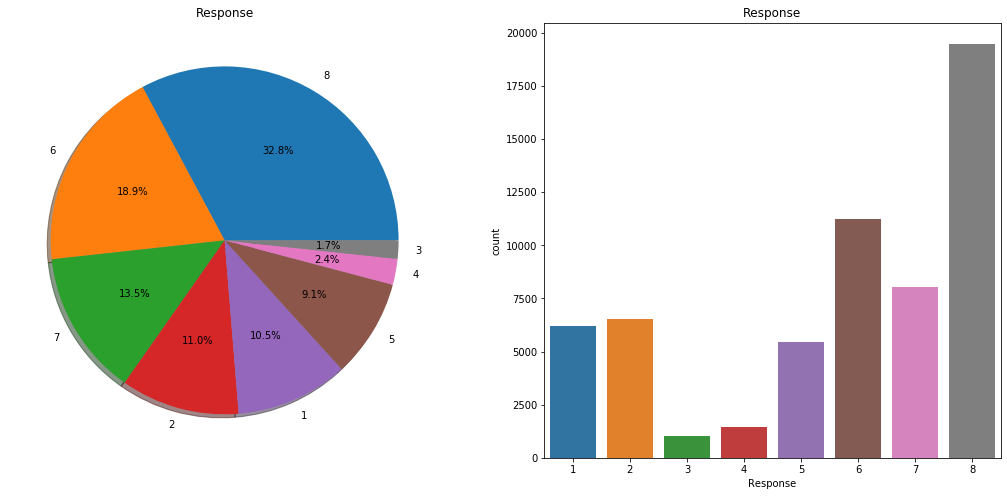

In [41]:
# ターゲットカラムとなる "Response" が trainデータにはどれぐらい格納されているか確認
import matplotlib.pyplot as plt
import seaborn as sns
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Response'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Response')
ax[0].set_ylabel('')
sns.countplot('Response',data=train_df,ax=ax[1])
ax[1].set_title('Response')
plt.show()

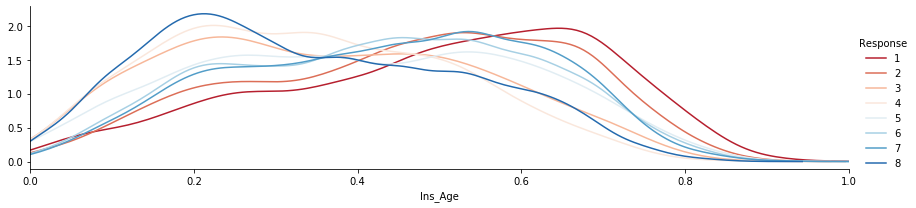

In [24]:
# 年齢とresponseの関係を見てみる
facet = sns.FacetGrid(train_df, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8], palette="RdBu")
facet.map(sns.kdeplot,'Ins_Age')
facet.set(xlim=(0, train_df['Ins_Age'].max()))
facet.add_legend()

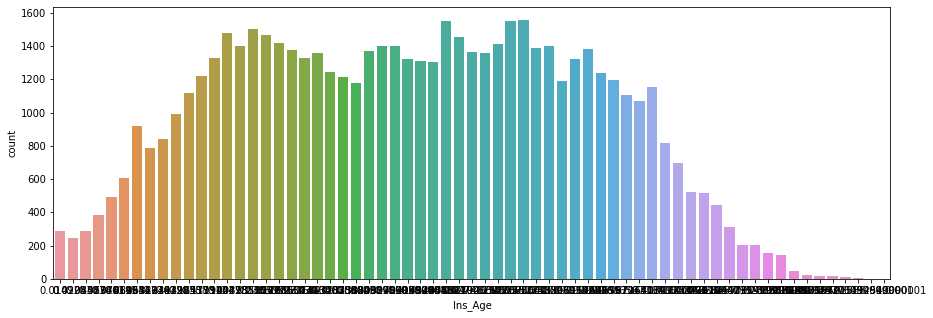

In [25]:
# 年齢の分布を確認する
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x="Ins_Age",data=train_df, ax=axis1)

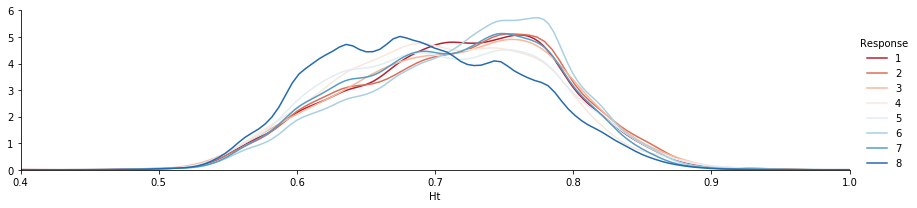

In [30]:
#身長 FacetGrid
facet = sns.FacetGrid(train_df, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8], palette="RdBu")
facet.map(sns.kdeplot,'Ht')
facet.set(xlim=(0.4, train_df['Ht'].max())) 
facet.add_legend() 

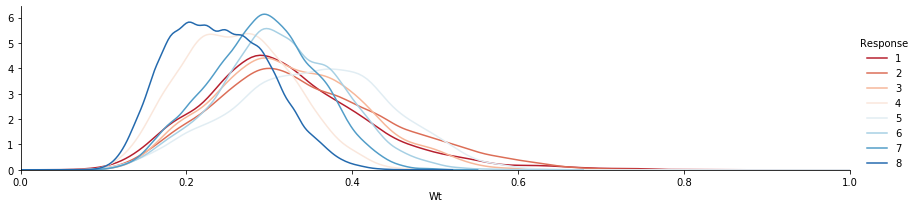

In [31]:
#体重 FacetGrid
facet = sns.FacetGrid(train_df, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8], palette="RdBu")
facet.map(sns.kdeplot,'Wt')
facet.set(xlim=(0, train_df['Wt'].max()))
facet.add_legend()

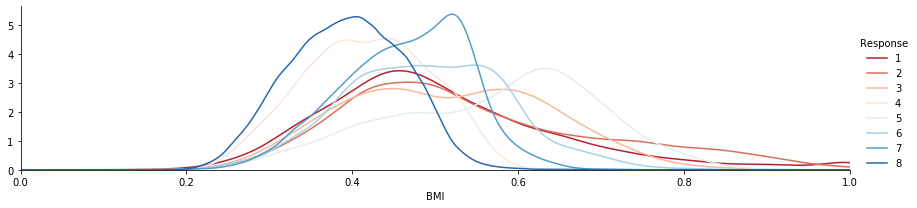

In [32]:
#BMI FacetGrid
facet = sns.FacetGrid(train_df, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8], palette="RdBu")
facet.map(sns.kdeplot,'BMI')
facet.set(xlim=(0, 1.0))
facet.add_legend()

[(0, 1.1)]

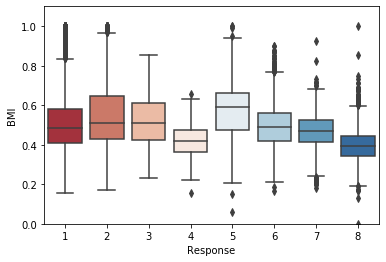

In [33]:
#BMI boxplot
ax = sns.boxplot(x="Response", y="BMI", data=train_df, 
                 order=[1,2,3,4,5,6,7,8], palette="RdBu")
ax.set(ylim=(0, 1.1))

Text(0, 0.5, 'Response')

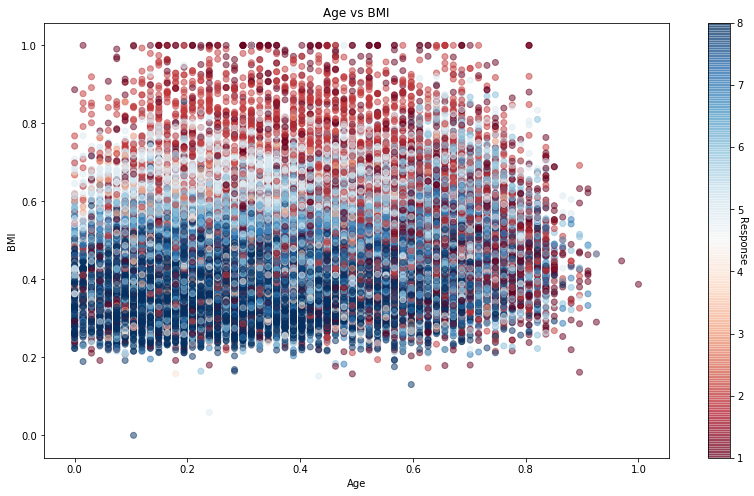

In [34]:
#Age vs  BMI
# AgeとBMIを軸に配置し、responseとの相関を確認する
# BMIが高いほうが、確実にresponseは下がっている
fig, ax = plt.subplots(1,1,figsize=(14,8))
cm = plt.cm.get_cmap('RdBu')
ax = plt.scatter(train_df["Ins_Age"], train_df["BMI"], c=train_df["Response"], alpha=0.5, cmap=cm)
plt.xlim=(0, 1.0)
plt.ylim=(0, 1.0)

plt.title("Age vs BMI")
plt.xlabel("Age")
plt.ylabel("BMI")

cbar=plt.colorbar(ax)
cbar.ax.set_ylabel('Response', rotation=270)

Text(0, 0.5, 'Response')

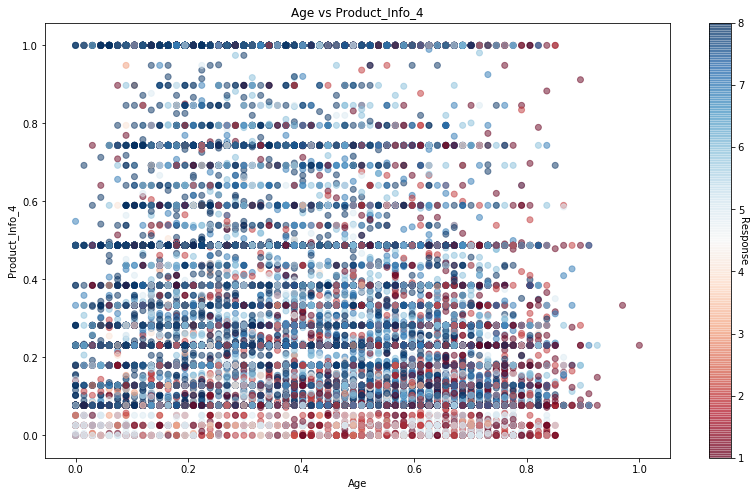

In [39]:
# 他のカラムと入れ替えて実施してみよう
fig, ax = plt.subplots(1,1,figsize=(14,8))
cm = plt.cm.get_cmap('RdBu')
ax = plt.scatter(train_df["Ins_Age"], train_df["Product_Info_4"], c=train_df["Response"], alpha=0.5, cmap=cm)
plt.xlim=(0, 1.0)
plt.ylim=(0, 1.0)

plt.title("Age vs Product_Info_4")
plt.xlabel("Age")
plt.ylabel("Product_Info_4")

cbar=plt.colorbar(ax)
cbar.ax.set_ylabel('Response', rotation=270)

In [55]:
# Pclass vs Survived (等級と生存率は相関がありそう、金持ちが生き残る)
train_df[['Medical_Keyword_24', 'Response']].groupby(['Response'], as_index=False).mean().sort_values(by='Medical_Keyword_24', ascending=False)

,Response,Medical_Keyword_24
0,1,0.036894
1,2,0.033578
5,6,0.024214
4,5,0.023380
6,7,0.018812
2,3,0.011846
7,8,0.005388
3,4,0.004202


### データの前処理（欠損対応）

In [59]:
##  "Id" のカラムを削除する（学習には不要であるため） 

train_df.drop(columns=['Id'],axis=1, inplace=True)
test_df.drop(columns=['Id'],axis=1, inplace=True)

## trainデータのターゲットラベルは保存しておく 
y = train_df['Response'].reset_index(drop=True)

In [62]:
## 欠損値などを確認するために、trainとtestを一旦マージしてしまう
all_data = pd.concat((train_df, test_df)).reset_index(drop = True)
## ターゲットラベルはyに保存したので、一旦削除する
all_data.drop(['Response'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [64]:
# 欠損値を出力する関数
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [66]:
# 結合したデータの欠損状況を調べる
# Medical_History_10は1%しか埋まってないという形(99%はnullな状態)
pd.set_option('display.max_rows', 20)
missing_percentage(all_data)

,Total,Percent
Medical_History_10,78388,99.04
Medical_History_32,77688,98.16
Medical_History_24,74165,93.71
Medical_History_15,59460,75.13
Family_Hist_5,55435,70.04
Family_Hist_3,45305,57.24
Family_Hist_2,38536,48.69
Insurance_History_5,33501,42.33
Family_Hist_4,25861,32.68
Employment_Info_6,14641,18.50


In [67]:
#　欠損のあるMedical_HIstoryについて状態を再度確認してみる
all_data[['Medical_History_1','Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32']].describe()

,Medical_History_1,Medical_History_10,Medical_History_15,Medical_History_24,Medical_History_32
count,67285.000000,758.000000,19686.000000,4981.000000,1458.000000
mean,7.928572,143.426121,124.240221,50.449709,11.718107
std,12.912942,106.499108,98.668380,77.921630,38.257761
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.250000,18.000000,1.000000,0.000000
50%,4.000000,225.000000,117.000000,8.000000,0.000000
75%,9.000000,240.000000,240.000000,63.000000,2.000000
max,240.000000,240.000000,240.000000,240.000000,240.000000


In [82]:
# ここでは一旦変数として重要ではないと判断して、削除してみる
all_data.drop(['Medical_History_1'], axis = 1, inplace = True)
all_data.drop(['Medical_History_10'], axis = 1, inplace = True)
all_data.drop(['Medical_History_15'], axis = 1, inplace = True)
all_data.drop(['Medical_History_24'], axis = 1, inplace = True)
all_data.drop(['Medical_History_32'], axis = 1, inplace = True)

In [71]:
# 欠損のあるFamily_Histについて、データ状態を再度確認してみる
all_data[['Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5']].describe()

,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5
count,40610.000000,33841.000000,53285.000000,23711.000000
mean,0.474554,0.498315,0.445338,0.486604
std,0.154993,0.140164,0.163434,0.129180
min,0.000000,0.000000,0.000000,0.000000
25%,0.362319,0.411765,0.323944,0.410714
50%,0.463768,0.519608,0.436620,0.508929
75%,0.579710,0.607843,0.563380,0.580357
max,1.000000,1.000000,1.000000,1.000000


In [74]:
# Family_Histは欠損数はMedicalに比べていくらかマシであり、カーディナリティも高いほうなおで、平均値で補完する
all_data['Family_Hist_2'].fillna(all_data['Family_Hist_3'].mean(), inplace=True)
all_data['Family_Hist_3'].fillna(all_data['Family_Hist_3'].mean(), inplace=True)
all_data['Family_Hist_4'].fillna(all_data['Family_Hist_3'].mean(), inplace=True)
all_data['Family_Hist_5'].fillna(all_data['Family_Hist_3'].mean(), inplace=True)

In [75]:
# 欠損のあるEmployment_Infoについて、データ状態を再度確認してみる
all_data[['Employment_Info_1','Employment_Info_4','Employment_Info_6']].describe()

,Employment_Info_1,Employment_Info_4,Employment_Info_6
count,79124.000000,70230.000000,64505.000000
mean,0.077930,0.006340,0.363228
std,0.082746,0.033368,0.350589
min,0.000000,0.000000,0.000000
25%,0.035000,0.000000,0.060000
50%,0.060000,0.000000,0.250000
75%,0.100000,0.000000,0.580000
max,1.000000,1.000000,1.000000


In [76]:
# こちらも同じく一旦平均値補完
all_data['Employment_Info_1'].fillna(all_data['Employment_Info_1'].mean(), inplace=True)
all_data['Employment_Info_4'].fillna(all_data['Employment_Info_4'].mean(), inplace=True)
all_data['Employment_Info_6'].fillna(all_data['Employment_Info_6'].mean(), inplace=True)

In [77]:
# 欠損のあるInsurance_Historyについて、データ状態を再度確認してみる
all_data[['Insurance_History_5']].describe()

,Insurance_History_5
count,45645.000000
mean,0.001710
std,0.006465
min,0.000000
25%,0.000400
50%,0.000933
75%,0.002000
max,1.000000


In [78]:
# こちらも同じく一旦平均値補完
all_data['Insurance_History_5'].fillna(all_data['Insurance_History_5'].mean(), inplace=True)

In [79]:
# これで欠損値の補完対応は完了したので、再度関数を呼び出してチェックする（出力がなければOK）
missing_percentage(all_data)

,Total,Percent


In [84]:
all_data.shape

(79146, 121)

In [85]:
# one-hot-vector化
categorical=['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 
             'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 
             'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 
             'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 
             'Family_Hist_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 
             'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_11', 'Medical_History_12', 
             'Medical_History_13', 'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 
             'Medical_History_19', 'Medical_History_20', 'Medical_History_21', 'Medical_History_22', 'Medical_History_23', 
             'Medical_History_25', 'Medical_History_26', 'Medical_History_27', 'Medical_History_28', 'Medical_History_29', 
             'Medical_History_30', 'Medical_History_31', 'Medical_History_33', 'Medical_History_34', 'Medical_History_35', 
             'Medical_History_36', 'Medical_History_37', 'Medical_History_38', 'Medical_History_39', 
             'Medical_History_40', 'Medical_History_41']
## Creating dummy variable 
final_features = pd.get_dummies(all_data, columns=categorical).reset_index(drop=True)
final_features.shape

(79146, 947)

In [87]:
final_features

,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Ht,Ins_Age,Insurance_History_5,Medical_Keyword_1,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_2,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_3,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_4,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Product_Info_4,Wt,Product_Info_1_1,Product_Info_1_2,...,Medical_History_18_3,Medical_History_19_1,Medical_History_19_2,Medical_History_19_3,Medical_History_20_1,Medical_History_20_2,Medical_History_20_3,Medical_History_21_1,Medical_History_21_2,Medical_History_21_3,Medical_History_22_1,Medical_History_22_2,Medical_History_23_1,Medical_History_23_2,Medical_History_23_3,Medical_History_25_1,Medical_History_25_2,Medical_History_25_3,Medical_History_26_1,Medical_History_26_2,Medical_History_26_3,Medical_History_27_1,Medical_History_27_2,Medical_History_27_3,Medical_History_28_1,Medical_History_28_2,Medical_History_28_3,Medical_History_29_1,Medical_History_29_2,Medical_History_29_3,Medical_History_30_1,Medical_History_30_2,Medical_History_30_3,Medical_History_31_1,Medical_History_31_2,Medical_History_31_3,Medical_History_33_1,Medical_History_33_2,Medical_History_33_3,Medical_History_34_1,Medical_History_34_2,Medical_History_34_3,Medical_History_35_1,Medical_History_35_2,Medical_History_35_3,Medical_History_36_1,Medical_History_36_2,Medical_History_36_3,Medical_History_37_1,Medical_History_37_2,Medical_History_37_3,Medical_History_38_1,Medical_History_38_2,Medical_History_38_3,Medical_History_39_1,Medical_History_39_2,Medical_History_39_3,Medical_History_40_1,Medical_History_40_2,Medical_History_40_3,Medical_History_41_1,Medical_History_41_2,Medical_History_41_3
0,0.323008,0.028,0.00000,0.363228,0.498315,0.598039,0.498315,0.526786,0.581818,0.641791,0.000667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.076923,0.148536,1,0,...,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1
1,0.272288,0.000,0.00000,0.001800,0.188406,0.498315,0.084507,0.498315,0.600000,0.059701,0.000133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.076923,0.131799,1,0,...,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0
2,0.428780,0.030,0.00000,0.030000,0.304348,0.498315,0.225352,0.498315,0.745455,0.029851,0.001710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.076923,0.288703,1,0,...,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0
3,0.352438,0.042,0.00000,0.200000,0.420290,0.498315,0.352113,0.498315,0.672727,0.164179,0.001710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.487179,0.205021,1,0,...,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0
4,0.424046,0.027,0.00000,0.050000,0.463768,0.498315,0.408451,0.498315,0.654545,0.417910,0.001710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [88]:
# concat(結合）していたデータをtrainとtestの粒度に戻す
X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(y):, :]

In [92]:
# 各カラムの中で出願回数が最も多い要素が要素全体に対して95%の割合を占めるようなカラムは
# ターゲットに対して相関が低いと判断して、削除する
def overfit_reducer(df):

    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 95.0:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(X)

X = X.drop(overfitted_features, axis=1)
X_sub = X_sub.drop(overfitted_features, axis=1)

### モデルの構築

In [96]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [95]:
#　学習データをバリデーションとテストに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 777)

In [97]:
# モデルの定義
lr = LogisticRegression(random_state=5, class_weight='balanced', solver='saga')

In [98]:
# パラメータ
#parameters = {'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)}
parameters = {'C': (0.0001,0.001)}

In [99]:
# 交差検証（5分割で実施）
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [100]:
# グリッドサーチでパラメータチューニング
grid_search = GridSearchCV(lr, parameters, n_jobs=-1, cv=skf)
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_clas

LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=5, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
grid_search.cv_results_['std_test_score'][1]

0.12471596977410238

In [102]:
grid_search.best_score_

0.3527161622479911

In [103]:
grid_search.cv_results_

{'mean_fit_time': array([21.65405955, 22.41927452, 22.11954832, 44.56311917, 48.21469235,
        46.72304006]),
 'std_fit_time': array([0.68457049, 0.37118625, 0.05658585, 8.06054354, 4.40560194,
        0.74923884]),
 'mean_score_time': array([0.01333337, 0.01828461, 0.00795889, 0.02437277, 0.01404915,
        0.01774192]),
 'std_score_time': array([0.01056389, 0.01385574, 0.00136404, 0.01319673, 0.01371997,
        0.01314358]),
 'param_C': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10}],
 'split0_test_score': array([0.29713805, 0.31866282, 0.29341029, 0.38239538, 0.29064454,
        0.38371813]),
 'split1_test_score': array([0.3541366 , 0.37506013, 0.02116402, 0.07130832, 0.31601732,
        0.12566138]),
 'split2_test_score': array([0.38342156, 0.28488932, 0.35779596,

In [105]:
submission_lr = pd.read_csv("./sample_submission.csv")
submission_lr.iloc[:,1] = grid_search.predict(X_sub)

In [106]:
submission_lr.to_csv("submission_lr.csv", index=False)

### 出力されたファイルをkaggleにアップロードすることで、精度を確認することができる

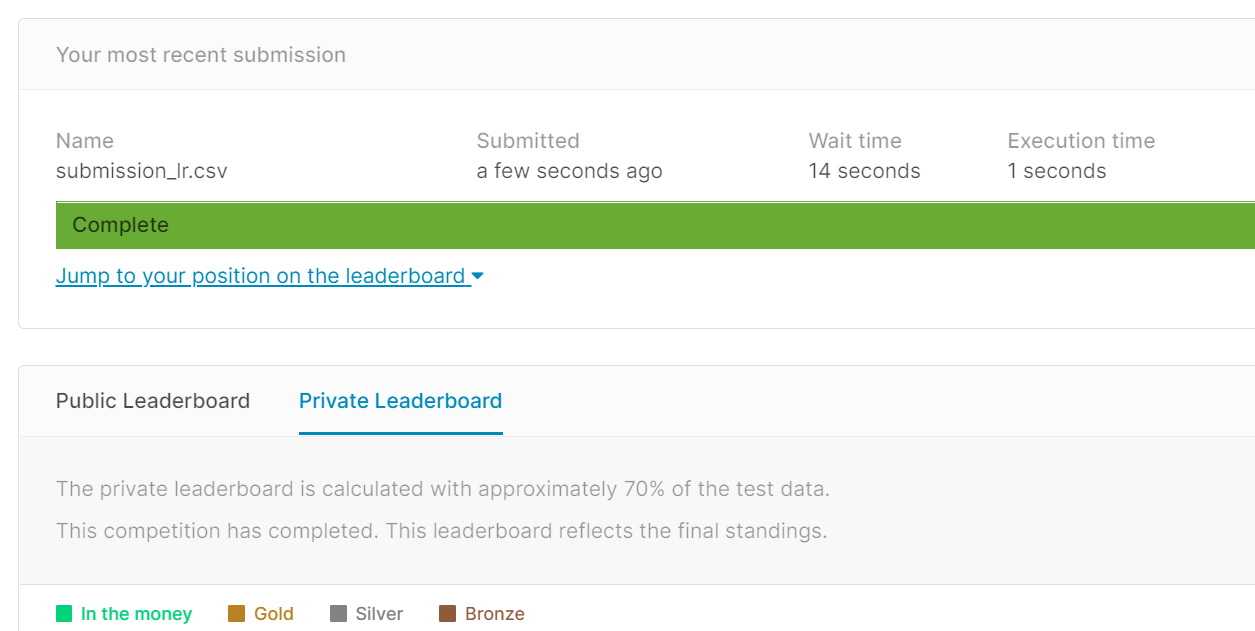